In [50]:
# Basic imports
import pandas as pd
import numpy as np
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# Modeling
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from keras import layers
from keras import models
from keras import optimizers
from keras.models import model_from_json
from PIL import Image
from skimage import transform
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import VGG16

## Data Understanding

The data that I used for this project comes from a dataset from [Kaggle](https://www.kaggle.com/c/state-farm-distracted-driver-detection) titled "State Farm Distracted Driver Detection."

The dataset consists of 22,424 photos belonging to 10 classes. I split each class into train and validation groupings with 80% of the images in the train data and 20% in the validation data. 

Regarding the test data, the data source provided a folder of 79,388 unlabeled images. After going through many of these images, I manually labeled 338 of them, with each class containing 33 test photos, on average. 

A critical component of this project is that no driver appeared in both the train/validation data and the test data. This was done to prevent the model from learning the drivers' faces as opposed to the drivers' actions.

#### The 10 classes are as follows:

**c0 = SAFE DRIVING**  
**c1 = TEXTING WITH RIGHT HAND**  
**c2 = TALKING ON THE PHONE WITH RIGHT HAND**  
**c3 = TEXTING WITH LEFT HAND**  
**c4 = TALKING ON THE PHONE WITH LEFT HAND**  
**c5 = OPERATING THE RADIO**  
**c6 = DRINKING A BEVERAGE**  
**c7 = REACHING BEHIND**  
**c8 = HAIR AND MAKEUP**  
**c9 = TALKING TO PASSENGER**  

In [51]:
c0_img = Image.open('split_data/correct_train/c0/img_208.jpg')
c0_img = c0_img.resize((320, 240))

c1_img = Image.open('split_data/correct_train/c1/img_115.jpg')
c1_img = c1_img.resize((320, 240))

c2_img = Image.open('split_data/correct_train/c2/img_271.jpg')
c2_img = c2_img.resize((320, 240))

c3_img = Image.open('split_data/correct_train/c3/img_477.jpg')
c3_img = c3_img.resize((320, 240))

c4_img = Image.open('split_data/correct_train/c4/img_1762.jpg')
c4_img = c4_img.resize((320, 240))

c5_img = Image.open('split_data/correct_train/c5/img_1605.jpg')
c5_img = c5_img.resize((320, 240))

c6_img = Image.open('split_data/correct_train/c6/img_372.jpg')
c6_img = c6_img.resize((320, 240))

c7_img = Image.open('split_data/correct_train/c7/img_845.jpg')
c7_img = c7_img.resize((320, 240))

c8_img = Image.open('split_data/correct_train/c8/img_2667.jpg')
c8_img = c8_img.resize((320, 240))

c9_img = Image.open('split_data/correct_train/c9/img_2412.jpg')
c9_img = c9_img.resize((320, 240))

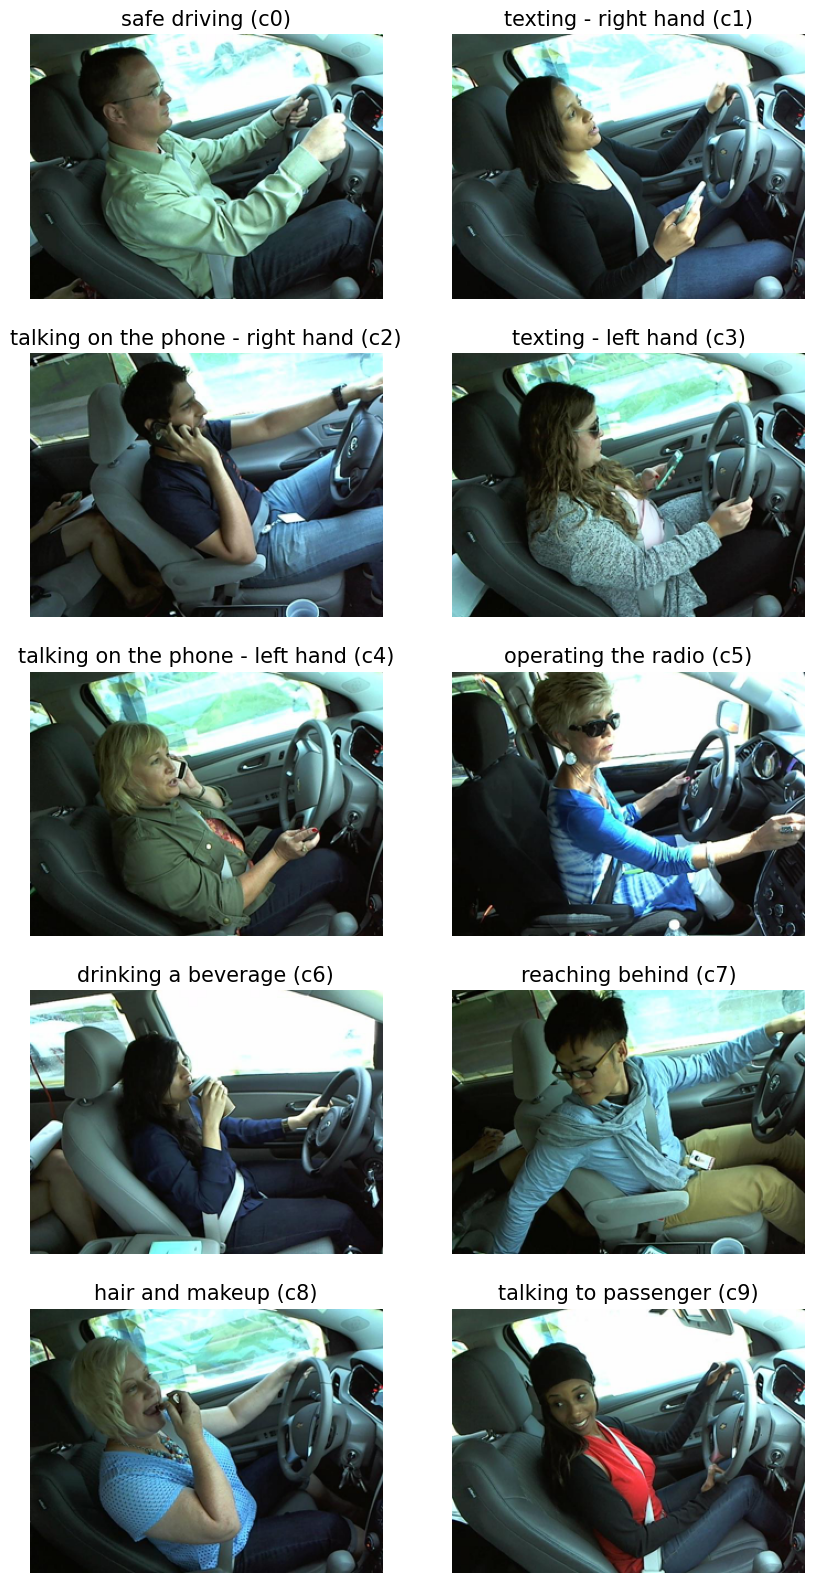

In [52]:
fig = plt.figure(figsize=(10, 20))
rows = 5
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(c0_img)
plt.axis('off')
plt.title("safe driving (c0)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 2)
plt.imshow(c1_img)
plt.axis('off')
plt.title("texting - right hand (c1)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 3)
plt.imshow(c2_img)
plt.axis('off')
plt.title("talking on the phone - right hand (c2)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 4)
plt.imshow(c3_img)
plt.axis('off')
plt.title("texting - left hand (c3)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 5)
plt.imshow(c4_img)
plt.axis('off')
plt.title("talking on the phone - left hand (c4)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 6)
plt.imshow(c5_img)
plt.axis('off')
plt.title("operating the radio (c5)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 7)
plt.imshow(c6_img)
plt.axis('off')
plt.title("drinking a beverage (c6)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 8)
plt.imshow(c7_img)
plt.axis('off')
plt.title("reaching behind (c7)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 9)
plt.imshow(c8_img)
plt.axis('off')
plt.title("hair and makeup (c8)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 10)
plt.imshow(c9_img)
plt.axis('off')
plt.title("talking to passenger (c9)",  fontdict = {'fontsize': 15});

## Data Analysis

### Visualizing Class Sizes

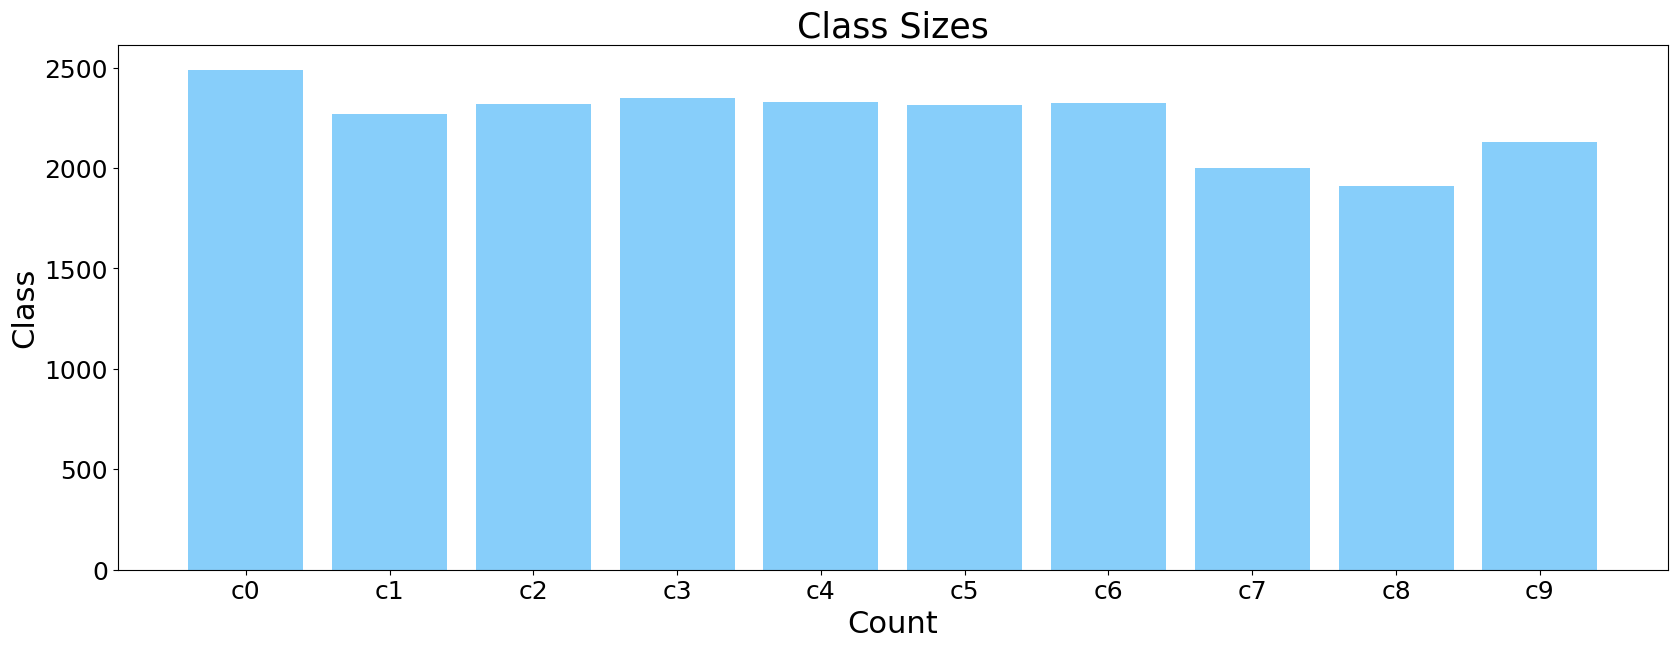

In [53]:
train_c0 = 'split_data/correct_train/c0'
train_c0_len = len([file for file in os.listdir(train_c0) if file.endswith('.jpg')])

train_c1 = 'split_data/correct_train/c1'
train_c1_len = len([file for file in os.listdir(train_c1) if file.endswith('.jpg')])

train_c2 = 'split_data/correct_train/c2'
train_c2_len = len([file for file in os.listdir(train_c2) if file.endswith('.jpg')])

train_c3 = 'split_data/correct_train/c3'
train_c3_len = len([file for file in os.listdir(train_c3) if file.endswith('.jpg')])

train_c4 = 'split_data/correct_train/c4'
train_c4_len = len([file for file in os.listdir(train_c4) if file.endswith('.jpg')])

train_c5 = 'split_data/correct_train/c5'
train_c5_len = len([file for file in os.listdir(train_c5) if file.endswith('.jpg')])

train_c6 = 'split_data/correct_train/c6'
train_c6_len = len([file for file in os.listdir(train_c6) if file.endswith('.jpg')])

train_c7 = 'split_data/correct_train/c7'
train_c7_len = len([file for file in os.listdir(train_c7) if file.endswith('.jpg')])

train_c8 = 'split_data/correct_train/c8'
train_c8_len = len([file for file in os.listdir(train_c8) if file.endswith('.jpg')])

train_c9 = 'split_data/correct_train/c9'
train_c9_len = len([file for file in os.listdir(train_c9) if file.endswith('.jpg')])

sizes = [train_c0_len, train_c1_len, train_c2_len, train_c3_len, train_c4_len, train_c5_len, train_c6_len,
        train_c7_len, train_c8_len, train_c9_len]

categories = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
              
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(211)

ax.bar(categories, sizes, color = "lightskyblue")
ax.tick_params(axis='both', which='major', labelsize=18)

plt.title('Class Sizes',size=25)
plt.ylabel('Class',size=22)
plt.xlabel('Count',size=22)

plt.show()


## Modeling

The dataset is quite large and the classes are relatively balanced, so no data augmentation is needed.

In [54]:
# All images will be rescaled by 1./255

train_dir = 'split_data/correct_train'
test_dir = 'split_data/correct_test'
# validation_dir = 'split_data/validation'


train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.20)
test_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=7173,
    class_mode='categorical',
    subset = 'training')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=897,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=1952,
    class_mode='categorical',
    subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [55]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(validation_generator)

In [56]:
# count = 0
# for test_image in test_images:
#     if np.array(test_images) == np.array(train_images):
#         count +=1

In [57]:
train_images.shape

(7173, 160, 120, 3)

In [58]:
train_labels.shape

(7173, 10)

In [59]:
val_images.shape

(1952, 160, 120, 3)

In [60]:
val_labels.shape

(1952, 10)

### Baseline Model

In [61]:
baseline_model = Sequential()
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(10,activation='softmax'))

In [62]:
baseline_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [63]:
baseline_history = baseline_model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30
  1/718 [..............................] - ETA: 3:23 - loss: 2.2702 - acc: 0.3000

2022-12-25 17:45:17.708079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.4408 - acc: 0.5422

2022-12-25 17:45:23.566010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 7s 10ms/step - loss: 1.4408 - acc: 0.5422 - val_loss: 0.8357 - val_acc: 0.7444
Epoch 2/30
718/718 [==============================] - 6s 8ms/step - loss: 0.5736 - acc: 0.8453 - val_loss: 0.4230 - val_acc: 0.9006
Epoch 3/30
718/718 [==============================] - 6s 8ms/step - loss: 0.3261 - acc: 0.9249 - val_loss: 0.2554 - val_acc: 0.9503
Epoch 4/30
718/718 [==============================] - 6s 8ms/step - loss: 0.2344 - acc: 0.9467 - val_loss: 0.2730 - val_acc: 0.9314
Epoch 5/30
718/718 [==============================] - 6s 8ms/step - loss: 0.1740 - acc: 0.9622 - val_loss: 0.2500 - val_acc: 0.9349
Epoch 6/30
718/718 [==============================] - 6s 8ms/step - loss: 0.1363 - acc: 0.9707 - val_loss: 0.1769 - val_acc: 0.9570
Epoch 7/30
718/718 [==============================] - 6s 8ms/step - loss: 0.1034 - acc: 0.9788 - val_loss: 0.1460 - val_acc: 0.9636
Epoch 8/30
718/718 [==============================] - 6s 8ms/step - loss: 0.0708 - acc

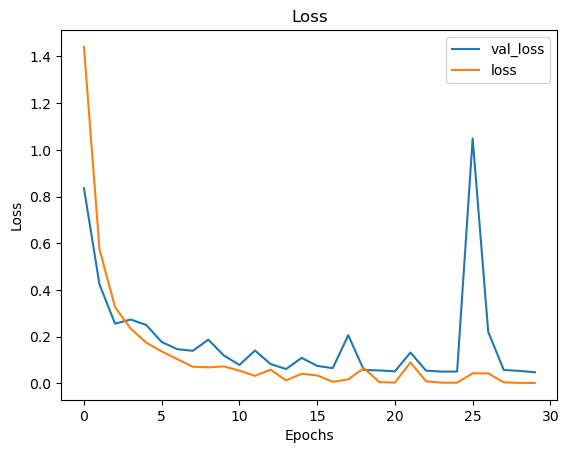

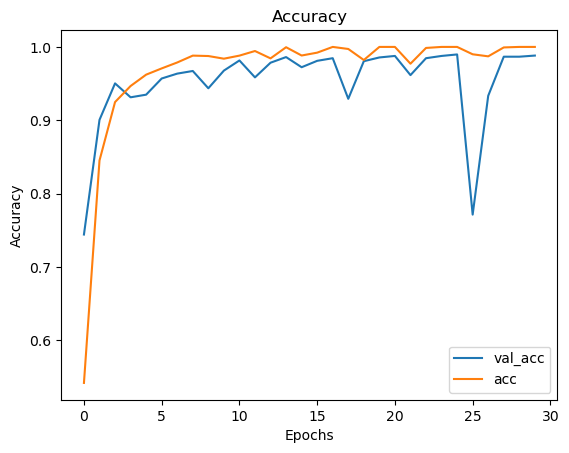

In [64]:
plt.figure() 
plt.plot(baseline_history.history['val_loss']) 
plt.plot(baseline_history.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(baseline_history.history['val_acc'])
plt.plot(baseline_history.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [65]:
baseline_results_train = baseline_model.evaluate(train_images, train_labels)
baseline_results_val = baseline_model.evaluate(val_images, val_labels)
baseline_results_test = baseline_model.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 7ms/step - loss: 4.2261 - acc: 0.4172


11/11 [==============================] - 0s 3ms/step


2022-12-25 17:48:13.502176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


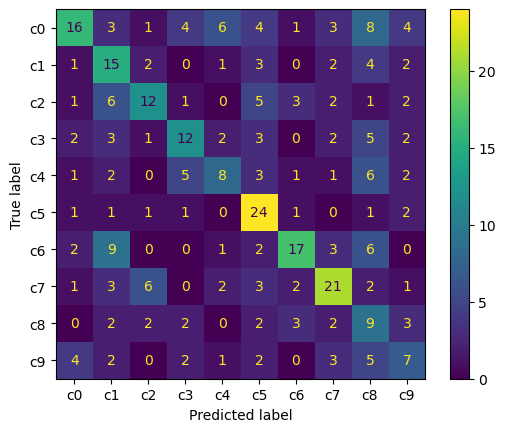

In [66]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(baseline_model, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 1

In [67]:
model1 = Sequential()

model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(160, 120, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model1.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(160, 120, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model1.add(layers.Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(10,activation='softmax'))

In [68]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [69]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 118, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 158, 118, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 57, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 77, 57, 64)       256       
 hNormalization)                                                 
                                                      

In [70]:
history_1 = model1.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 17:48:14.896483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.8797 - acc: 0.7341

2022-12-25 17:48:44.700023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 32s 45ms/step - loss: 0.8797 - acc: 0.7341 - val_loss: 0.2051 - val_acc: 0.9498
Epoch 2/30
718/718 [==============================] - 42s 59ms/step - loss: 0.1082 - acc: 0.9700 - val_loss: 0.0842 - val_acc: 0.9780
Epoch 3/30
718/718 [==============================] - 51s 70ms/step - loss: 0.0451 - acc: 0.9875 - val_loss: 0.0627 - val_acc: 0.9790
Epoch 4/30
718/718 [==============================] - 46s 64ms/step - loss: 0.0569 - acc: 0.9812 - val_loss: 0.1312 - val_acc: 0.9611
Epoch 5/30
718/718 [==============================] - 44s 61ms/step - loss: 0.0568 - acc: 0.9856 - val_loss: 0.0505 - val_acc: 0.9846
Epoch 6/30
718/718 [==============================] - 43s 59ms/step - loss: 0.0427 - acc: 0.9898 - val_loss: 0.0400 - val_acc: 0.9887
Epoch 7/30
718/718 [==============================] - 47s 65ms/step - loss: 0.0650 - acc: 0.9854 - val_loss: 0.1350 - val_acc: 0.9682
Epoch 8/30
718/718 [==============================] - 45s 63ms/step - los

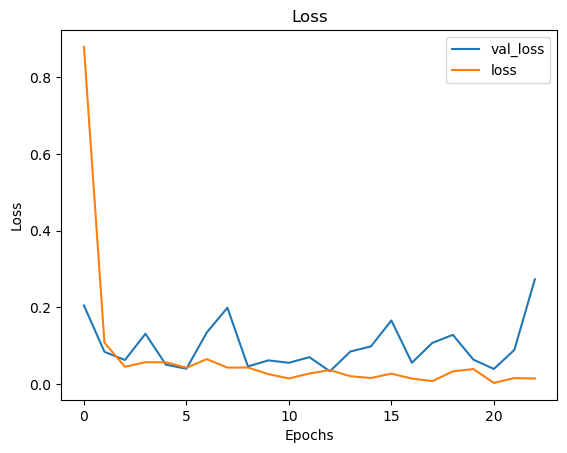

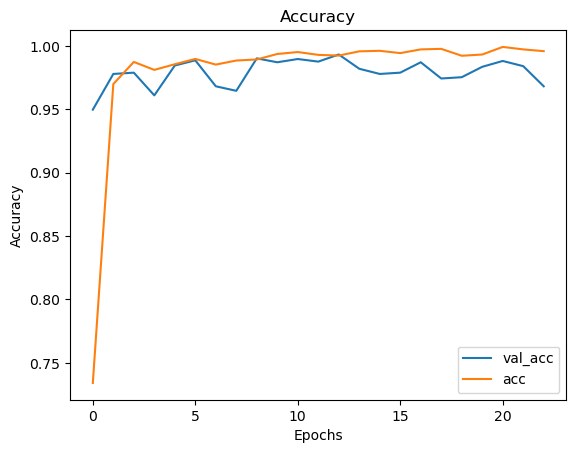

In [71]:
plt.figure() 
plt.plot(history_1.history['val_loss']) 
plt.plot(history_1.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_1.history['val_acc'])
plt.plot(history_1.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [72]:
model1_results_train = model1.evaluate(train_images, train_labels)
model1_results_val = model1.evaluate(val_images, val_labels)
model1_results_test = model1.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 37ms/step - loss: 9.3424 - acc: 0.4408


 5/11 [============>.................] - ETA: 0s

2022-12-25 18:05:38.988276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 39ms/step


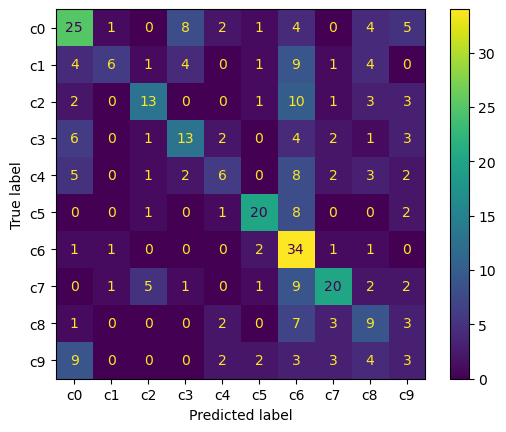

In [73]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model1, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 2

In [74]:
model2 = Sequential()

model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Flatten())
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(10,activation='softmax'))

In [75]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [76]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 158, 118, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 79, 59, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 79, 59, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 79, 59, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 77, 57, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 38, 28, 64)      

In [77]:
history_2 = model2.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 18:05:40.195425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.0516 - acc: 0.6770

2022-12-25 18:06:14.114869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 37s 50ms/step - loss: 1.0516 - acc: 0.6770 - val_loss: 1.0088 - val_acc: 0.6716
Epoch 2/30
718/718 [==============================] - 37s 52ms/step - loss: 0.2209 - acc: 0.9321 - val_loss: 0.3166 - val_acc: 0.9011
Epoch 3/30
718/718 [==============================] - 35s 49ms/step - loss: 0.1320 - acc: 0.9615 - val_loss: 0.3415 - val_acc: 0.9119
Epoch 4/30
718/718 [==============================] - 35s 49ms/step - loss: 0.0952 - acc: 0.9695 - val_loss: 0.0957 - val_acc: 0.9749
Epoch 5/30
718/718 [==============================] - 36s 50ms/step - loss: 0.0961 - acc: 0.9730 - val_loss: 0.2190 - val_acc: 0.9334
Epoch 6/30
718/718 [==============================] - 35s 49ms/step - loss: 0.0897 - acc: 0.9763 - val_loss: 0.1314 - val_acc: 0.9565
Epoch 7/30
718/718 [==============================] - 36s 50ms/step - loss: 0.0640 - acc: 0.9815 - val_loss: 0.1894 - val_acc: 0.9431
Epoch 8/30
718/718 [==============================] - 33s 46ms/step - los

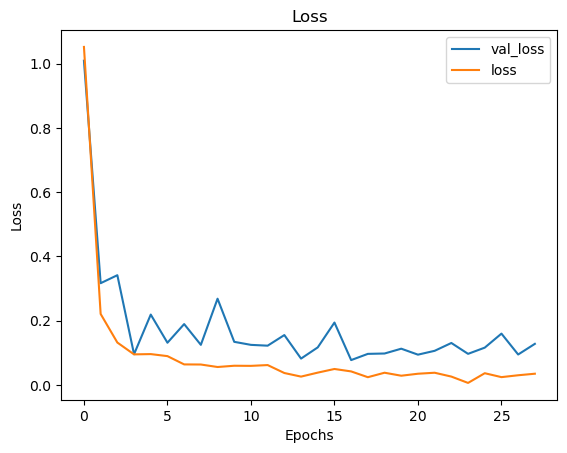

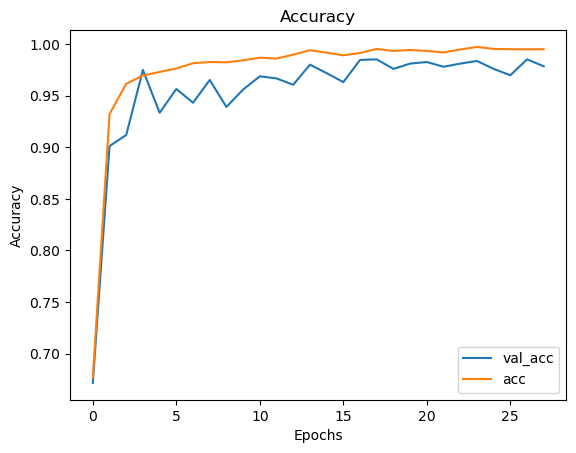

In [78]:
plt.figure() 
plt.plot(history_2.history['val_loss']) 
plt.plot(history_2.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_2.history['val_acc'])
plt.plot(history_2.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [79]:
model2_results_train = model2.evaluate(train_images, train_labels)
model2_results_val = model2.evaluate(val_images, val_labels)
model2_results_test = model2.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 31ms/step - loss: 4.5993 - acc: 0.5503


 5/11 [============>.................] - ETA: 0s

2022-12-25 18:20:37.658545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 30ms/step


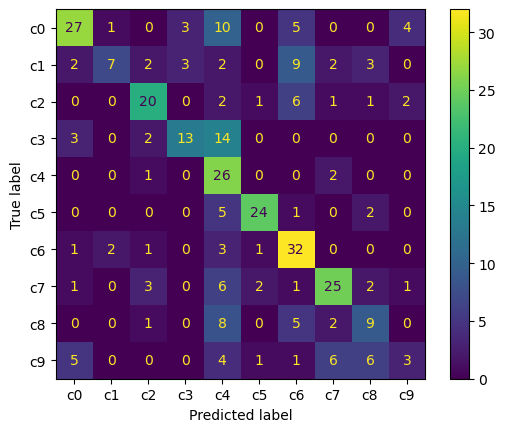

In [80]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model2, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Using Pre-trained Models

### Model 3 - ResNet 50

In [81]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(weights='imagenet',include_top=False,input_shape = (160,120,3))


for layer in resnet50.layers[:-3]:
    layer.trainable=False

In [82]:
model3 = models.Sequential()
model3.add(resnet50)

model3.add(layers.Flatten())
model3.add(layers.Dense(512,activation = 'relu'))
model3.add(layers.Dense(10,activation = 'softmax'))

In [83]:
model3.compile(loss='categorical_crossentropy',
               optimizer = optimizers.Adam(lr=1e-4),
               metrics=['acc'])

In [84]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)

history_3 = model3.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 18:20:40.985387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.3937 - acc: 0.5342

2022-12-25 18:21:36.976564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 68s 92ms/step - loss: 1.3937 - acc: 0.5342 - val_loss: 0.8916 - val_acc: 0.7357
Epoch 2/30
718/718 [==============================] - 64s 89ms/step - loss: 0.6364 - acc: 0.8064 - val_loss: 0.6137 - val_acc: 0.7833
Epoch 3/30
718/718 [==============================] - 65s 90ms/step - loss: 0.4076 - acc: 0.8871 - val_loss: 0.3649 - val_acc: 0.8868
Epoch 4/30
718/718 [==============================] - 69s 96ms/step - loss: 0.2801 - acc: 0.9246 - val_loss: 0.2677 - val_acc: 0.9247
Epoch 5/30
718/718 [==============================] - 73s 102ms/step - loss: 0.2153 - acc: 0.9419 - val_loss: 0.2956 - val_acc: 0.9155
Epoch 6/30
718/718 [==============================] - 74s 103ms/step - loss: 0.1734 - acc: 0.9547 - val_loss: 0.3477 - val_acc: 0.8832
Epoch 7/30
718/718 [==============================] - 74s 103ms/step - loss: 0.1705 - acc: 0.9519 - val_loss: 0.3958 - val_acc: 0.8811
Epoch 7: early stopping


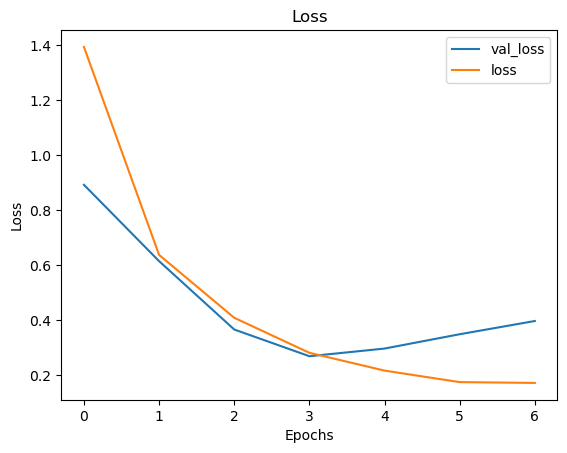

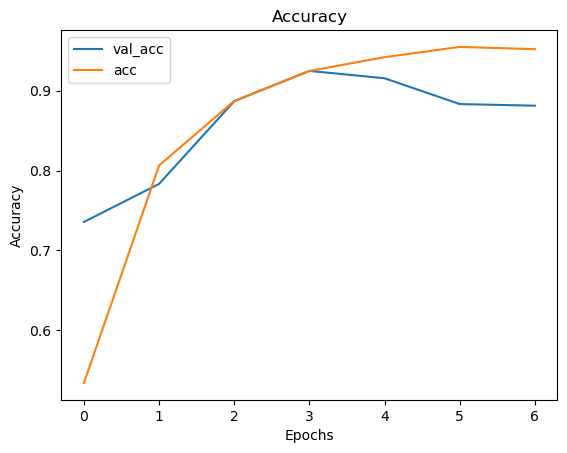

In [85]:
plt.figure() 
plt.plot(history_3.history['val_loss']) 
plt.plot(history_3.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_3.history['val_acc'])
plt.plot(history_3.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [86]:
model3_results_train = model3.evaluate(train_images, train_labels)
model3_results_val = model3.evaluate(val_images, val_labels)
model3_results_test = model3.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 182ms/step - loss: 3.3627 - acc: 0.3491


2022-12-25 18:29:40.267829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 153ms/step


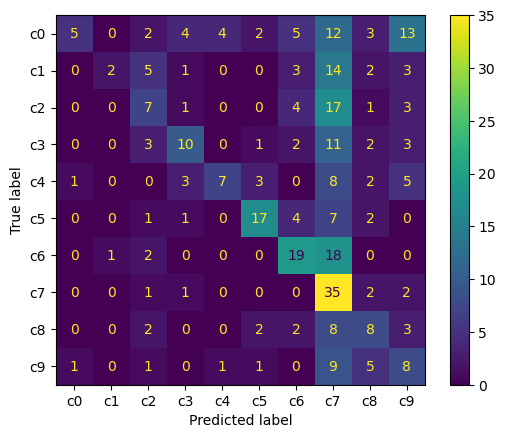

In [87]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model3, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 4 - InceptionV3

In [88]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in inception_v3.layers[:-3]:
    layer.trainable=False

In [89]:
model4 = Sequential()
model4.add(inception_v3)

model4.add(layers.Flatten())
model4.add(layers.Dense(512,activation='relu'))
model4.add(layers.Dense(10,activation='softmax'))

In [90]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [91]:
model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 2, 2048)        21802784  
                                                                 
 flatten_10 (Flatten)        (None, 12288)             0         
                                                                 
 dense_19 (Dense)            (None, 512)               6291968   
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 28,099,882
Trainable params: 6,297,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [92]:
history_4 = model4.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 18:29:45.765862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.0596 - acc: 0.6810

2022-12-25 18:30:18.340533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 41s 54ms/step - loss: 1.0596 - acc: 0.6810 - val_loss: 0.7043 - val_acc: 0.7654
Epoch 2/30
718/718 [==============================] - 36s 51ms/step - loss: 0.2610 - acc: 0.9187 - val_loss: 0.6172 - val_acc: 0.8058
Epoch 3/30
718/718 [==============================] - 36s 51ms/step - loss: 0.1303 - acc: 0.9601 - val_loss: 0.3046 - val_acc: 0.9022
Epoch 4/30
718/718 [==============================] - 37s 51ms/step - loss: 0.0868 - acc: 0.9734 - val_loss: 0.3506 - val_acc: 0.8950
Epoch 5/30
718/718 [==============================] - 36s 51ms/step - loss: 0.1036 - acc: 0.9664 - val_loss: 0.4732 - val_acc: 0.8673
Epoch 6/30
718/718 [==============================] - 37s 51ms/step - loss: 0.1013 - acc: 0.9670 - val_loss: 0.3761 - val_acc: 0.9042
Epoch 7/30
718/718 [==============================] - 37s 51ms/step - loss: 0.0592 - acc: 0.9813 - val_loss: 0.4940 - val_acc: 0.8694
Epoch 8/30
718/718 [==============================] - 37s 51ms/step - los

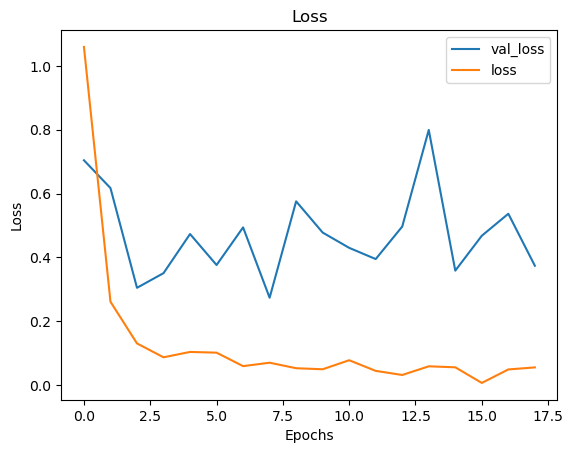

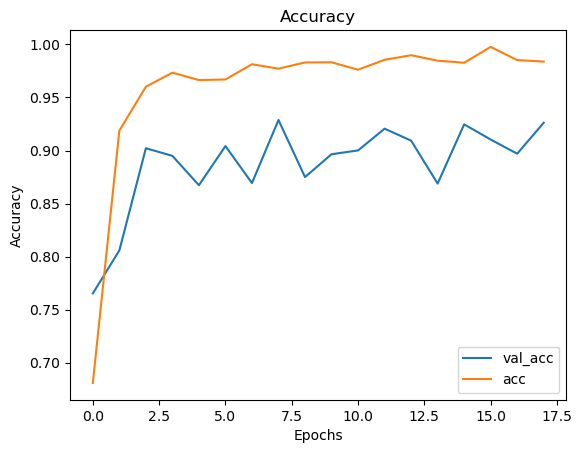

In [93]:
plt.figure() 
plt.plot(history_4.history['val_loss']) 
plt.plot(history_4.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_4.history['val_acc'])
plt.plot(history_4.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [94]:
model4_results_train = model4.evaluate(train_images, train_labels)
model4_results_val = model4.evaluate(val_images, val_labels)
model4_results_test = model4.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 209ms/step - loss: 6.1340 - acc: 0.3728


2022-12-25 18:41:47.291927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 110ms/step


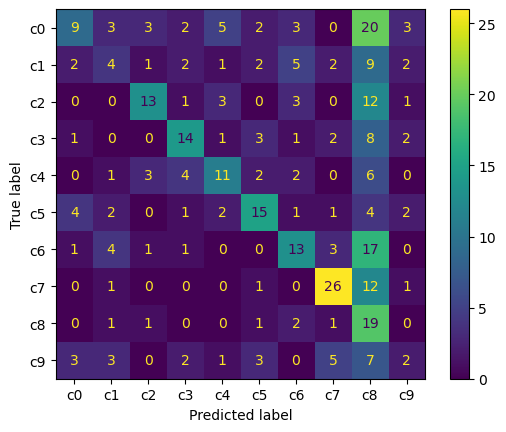

In [95]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model4, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 5 - VGG16

In [96]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16.layers[:-3]:
    layer.trainable=False

In [97]:
model5 = Sequential()
model5.add(vgg16)

model5.add(layers.Flatten())
model5.add(layers.Dense(512,activation='relu'))
model5.add(layers.Dense(10,activation='softmax'))

In [98]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [99]:
model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 7680)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               3932672   
                                                                 
 dense_22 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 8,657,418
Non-trainable params: 9,995,072
_________________________________________________________________


In [100]:
history_5 = model5.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 18:41:52.412958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4209 - acc: 0.8678

2022-12-25 18:43:29.313832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 118s 164ms/step - loss: 0.4209 - acc: 0.8678 - val_loss: 0.0744 - val_acc: 0.9785
Epoch 2/30
718/718 [==============================] - 110s 154ms/step - loss: 0.0639 - acc: 0.9813 - val_loss: 0.0773 - val_acc: 0.9785
Epoch 3/30
718/718 [==============================] - 115s 160ms/step - loss: 0.0274 - acc: 0.9926 - val_loss: 0.1003 - val_acc: 0.9723
Epoch 4/30
718/718 [==============================] - 119s 165ms/step - loss: 0.0417 - acc: 0.9877 - val_loss: 0.1557 - val_acc: 0.9529
Epoch 5/30
718/718 [==============================] - 121s 169ms/step - loss: 0.0168 - acc: 0.9953 - val_loss: 0.0507 - val_acc: 0.9872
Epoch 6/30
718/718 [==============================] - 122s 169ms/step - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0843 - val_acc: 0.9744
Epoch 7/30
718/718 [==============================] - 104s 145ms/step - loss: 0.0174 - acc: 0.9953 - val_loss: 0.0317 - val_acc: 0.9933
Epoch 8/30
718/718 [==============================] - 130s 

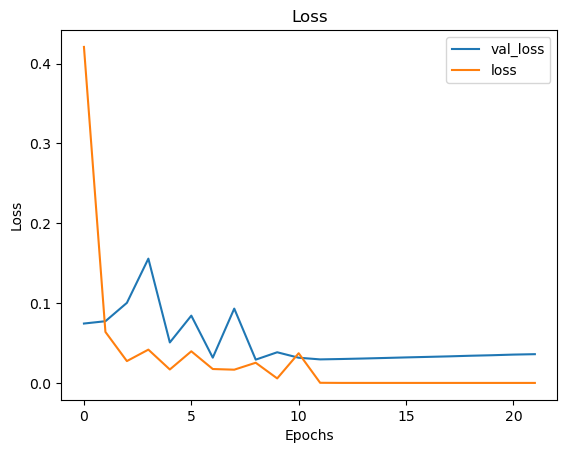

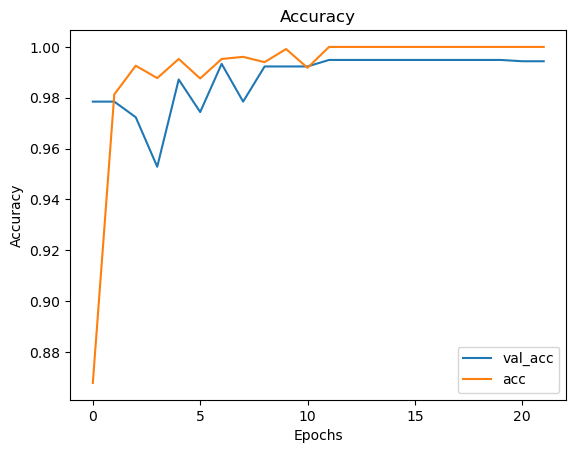

In [101]:
plt.figure() 
plt.plot(history_5.history['val_loss']) 
plt.plot(history_5.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_5.history['val_acc'])
plt.plot(history_5.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [102]:
model5_results_train = model5.evaluate(train_images, train_labels)
model5_results_val = model5.evaluate(val_images, val_labels)
model5_results_test = model5.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 148ms/step - loss: 1.5608 - acc: 0.7899


 1/11 [=>............................] - ETA: 1s

2022-12-25 20:28:04.341907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 150ms/step


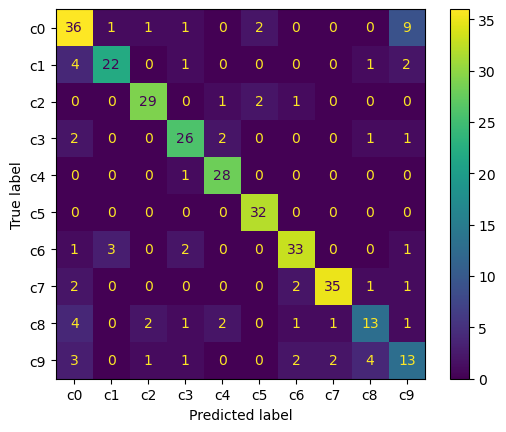

In [103]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model5, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 6 - VGG16 With Tuning

In [104]:
vgg16_b = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_b.layers[:-4]:
    layer.trainable=False

In [105]:
model6 = Sequential()
model6.add(vgg16_b)

model6.add(layers.Flatten())
model6.add(layers.Dense(512,activation='relu'))
model6.add(layers.Dense(10,activation='softmax'))

In [106]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model6.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [107]:
model6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 7680)              0         
                                                                 
 dense_23 (Dense)            (None, 512)               3932672   
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 11,017,226
Non-trainable params: 7,635,264
_________________________________________________________________


In [108]:
history_6 = model6.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 20:28:08.897493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4349 - acc: 0.8595

2022-12-25 20:30:44.137391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 166s 230ms/step - loss: 0.4349 - acc: 0.8595 - val_loss: 0.1844 - val_acc: 0.9488
Epoch 2/30
718/718 [==============================] - 59s 82ms/step - loss: 0.0744 - acc: 0.9774 - val_loss: 0.0573 - val_acc: 0.9857
Epoch 3/30
718/718 [==============================] - 89s 123ms/step - loss: 0.0466 - acc: 0.9862 - val_loss: 0.0439 - val_acc: 0.9857
Epoch 4/30
718/718 [==============================] - 103s 144ms/step - loss: 0.0365 - acc: 0.9897 - val_loss: 0.0794 - val_acc: 0.9831
Epoch 5/30
718/718 [==============================] - 106s 147ms/step - loss: 0.0286 - acc: 0.9911 - val_loss: 0.0488 - val_acc: 0.9908
Epoch 6/30
718/718 [==============================] - 117s 163ms/step - loss: 0.0357 - acc: 0.9918 - val_loss: 0.0546 - val_acc: 0.9862
Epoch 7/30
718/718 [==============================] - 117s 163ms/step - loss: 0.0516 - acc: 0.9877 - val_loss: 0.0828 - val_acc: 0.9785
Epoch 8/30
718/718 [==============================] - 118s 165

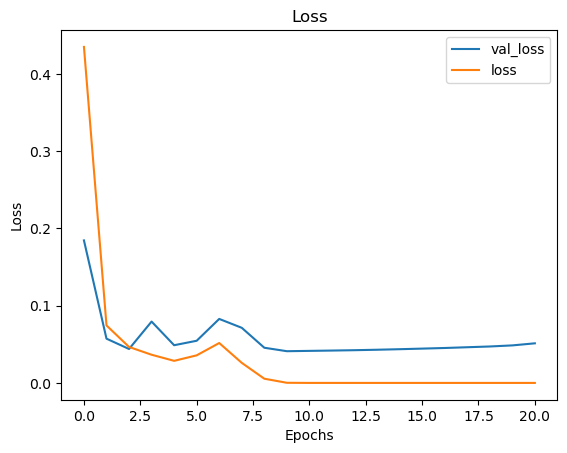

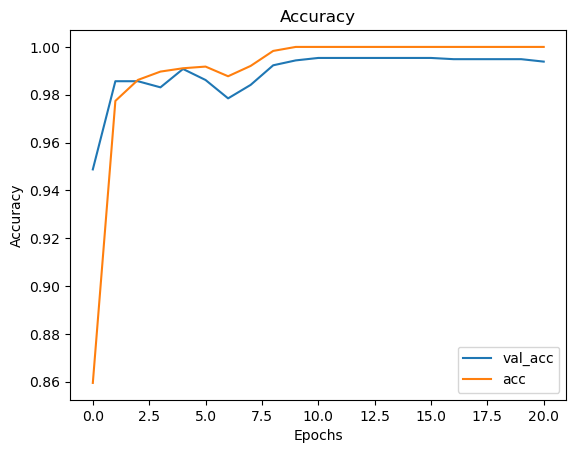

In [109]:
plt.figure() 
plt.plot(history_6.history['val_loss']) 
plt.plot(history_6.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_6.history['val_acc'])
plt.plot(history_6.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [110]:
model6_results_train = model6.evaluate(train_images, train_labels)
model6_results_val = model6.evaluate(val_images, val_labels)
model6_results_test = model6.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 272ms/step - loss: 1.7947 - acc: 0.8195


2022-12-25 21:18:48.832871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 263ms/step


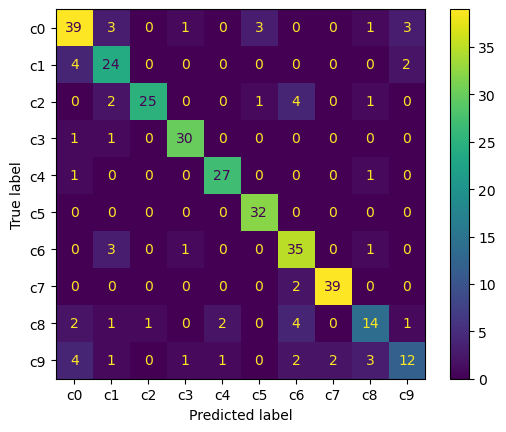

In [111]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model6, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 7

In [112]:
vgg16_c = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_c.layers[:-5]:
    layer.trainable=False

In [113]:
model7 = Sequential()
model7.add(vgg16_c)

model7.add(layers.Flatten())
model7.add(layers.Dense(512,activation='relu'))
model7.add(layers.Dense(10,activation='softmax'))

In [114]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model7.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [115]:
model7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 7680)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               3932672   
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 11,017,226
Non-trainable params: 7,635,264
_________________________________________________________________


In [116]:
history_7 = model7.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 21:18:53.562060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4395 - acc: 0.8577

2022-12-25 21:20:17.561058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 102s 141ms/step - loss: 0.4395 - acc: 0.8577 - val_loss: 0.1651 - val_acc: 0.9544
Epoch 2/30
718/718 [==============================] - 102s 142ms/step - loss: 0.0643 - acc: 0.9817 - val_loss: 0.0685 - val_acc: 0.9816
Epoch 3/30
718/718 [==============================] - 580s 809ms/step - loss: 0.0553 - acc: 0.9817 - val_loss: 0.1451 - val_acc: 0.9600
Epoch 4/30
718/718 [==============================] - 245s 342ms/step - loss: 0.0228 - acc: 0.9947 - val_loss: 0.0852 - val_acc: 0.9790
Epoch 5/30
718/718 [==============================] - 363s 506ms/step - loss: 0.0579 - acc: 0.9834 - val_loss: 0.1248 - val_acc: 0.9682
Epoch 6/30
718/718 [==============================] - 92s 128ms/step - loss: 0.0243 - acc: 0.9940 - val_loss: 0.0301 - val_acc: 0.9898
Epoch 7/30
718/718 [==============================] - 2731s 4s/step - loss: 0.0052 - acc: 0.9992 - val_loss: 0.0451 - val_acc: 0.9913
Epoch 8/30
718/718 [==============================] - 60s 84ms

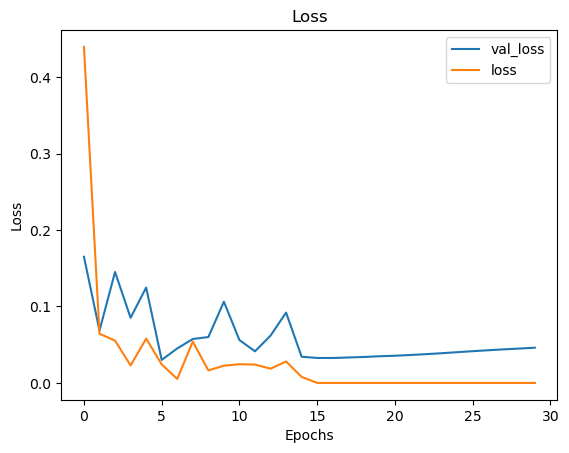

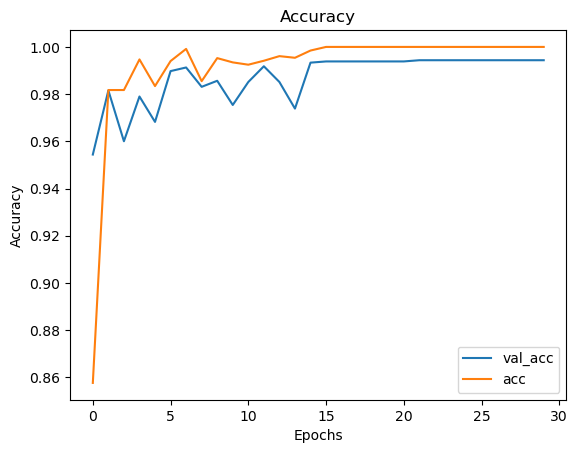

In [117]:
plt.figure() 
plt.plot(history_7.history['val_loss']) 
plt.plot(history_7.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_7.history['val_acc'])
plt.plot(history_7.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [118]:
model7_results_train = model7.evaluate(train_images, train_labels)
model7_results_val = model7.evaluate(val_images, val_labels)
model7_results_test = model7.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 269ms/step - loss: 1.7252 - acc: 0.8462


2022-12-25 23:01:18.330128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 252ms/step


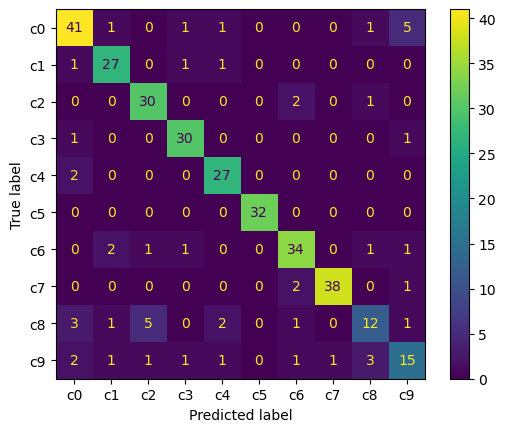

In [119]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model7, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 8

In [130]:
vgg16_d = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_d.layers[:-7]:
    layer.trainable=False

In [131]:
model8 = Sequential()
model8.add(vgg16_d)

model8.add(layers.Flatten())
model8.add(layers.Dense(512,activation='relu'))
model8.add(layers.Dense(10,activation='softmax'))

In [132]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model8.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [133]:
model8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 7680)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               3932672   
                                                                 
 dense_32 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 15,736,842
Non-trainable params: 2,915,648
_________________________________________________________________


In [134]:
history_8 = model8.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 23:25:27.593282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.6507 - acc: 0.7747

2022-12-25 23:26:34.660579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 78s 107ms/step - loss: 0.6507 - acc: 0.7747 - val_loss: 0.1745 - val_acc: 0.9447
Epoch 2/30
718/718 [==============================] - 80s 111ms/step - loss: 0.1090 - acc: 0.9649 - val_loss: 0.1258 - val_acc: 0.9672
Epoch 3/30
718/718 [==============================] - 115s 160ms/step - loss: 0.0677 - acc: 0.9798 - val_loss: 0.0807 - val_acc: 0.9744
Epoch 4/30
718/718 [==============================] - 115s 160ms/step - loss: 0.0455 - acc: 0.9880 - val_loss: 0.1041 - val_acc: 0.9734
Epoch 5/30
718/718 [==============================] - 103s 144ms/step - loss: 0.0430 - acc: 0.9880 - val_loss: 0.3209 - val_acc: 0.9211
Epoch 6/30
718/718 [==============================] - 104s 144ms/step - loss: 0.0459 - acc: 0.9854 - val_loss: 0.0645 - val_acc: 0.9892
Epoch 7/30
718/718 [==============================] - 103s 144ms/step - loss: 0.0380 - acc: 0.9905 - val_loss: 0.1144 - val_acc: 0.9734
Epoch 8/30
718/718 [==============================] - 102s 14

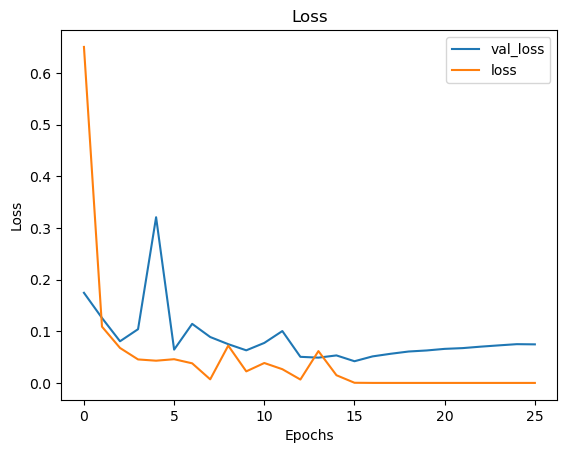

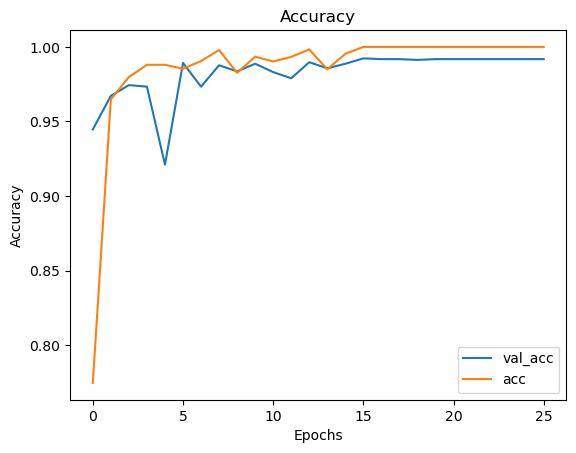

In [135]:
plt.figure() 
plt.plot(history_8.history['val_loss']) 
plt.plot(history_8.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_8.history['val_acc'])
plt.plot(history_8.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [136]:
model8_results_train = model8.evaluate(train_images, train_labels)
model8_results_val = model8.evaluate(val_images, val_labels)
model8_results_test = model8.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 150ms/step - loss: 2.1068 - acc: 0.8787


2022-12-26 00:27:03.042317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 154ms/step


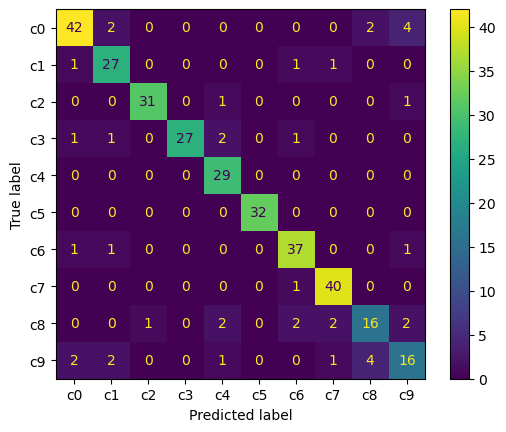

In [137]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model8, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 9

In [145]:
vgg16_e = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_e.layers[:-9]:
    layer.trainable=False

In [146]:
model9 = Sequential()
model9.add(vgg16_e)

model9.add(layers.Flatten())
model9.add(layers.Dense(512,activation='relu'))
model9.add(layers.Dense(10,activation='softmax'))

In [147]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model9.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [148]:
model9.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_18 (Flatten)        (None, 7680)              0         
                                                                 
 dense_35 (Dense)            (None, 512)               3932672   
                                                                 
 dense_36 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 16,917,002
Non-trainable params: 1,735,488
_________________________________________________________________


In [149]:
history_9 = model9.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-26 00:32:37.102961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.7077 - acc: 0.7551

2022-12-26 00:33:49.220611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 83s 115ms/step - loss: 0.7077 - acc: 0.7551 - val_loss: 0.1730 - val_acc: 0.9493
Epoch 2/30
718/718 [==============================] - 81s 113ms/step - loss: 0.1249 - acc: 0.9624 - val_loss: 0.1069 - val_acc: 0.9728
Epoch 3/30
718/718 [==============================] - 82s 115ms/step - loss: 0.0621 - acc: 0.9822 - val_loss: 0.1248 - val_acc: 0.9606
Epoch 4/30
718/718 [==============================] - 104s 145ms/step - loss: 0.0674 - acc: 0.9791 - val_loss: 0.0562 - val_acc: 0.9872
Epoch 5/30
718/718 [==============================] - 104s 144ms/step - loss: 0.0476 - acc: 0.9842 - val_loss: 0.0768 - val_acc: 0.9790
Epoch 6/30
718/718 [==============================] - 104s 145ms/step - loss: 0.0334 - acc: 0.9904 - val_loss: 0.0502 - val_acc: 0.9836
Epoch 7/30
718/718 [==============================] - 106s 147ms/step - loss: 0.0585 - acc: 0.9833 - val_loss: 0.1399 - val_acc: 0.9693
Epoch 8/30
718/718 [==============================] - 107s 149

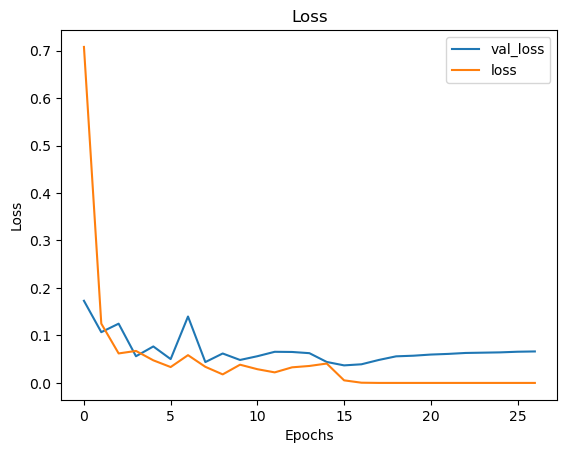

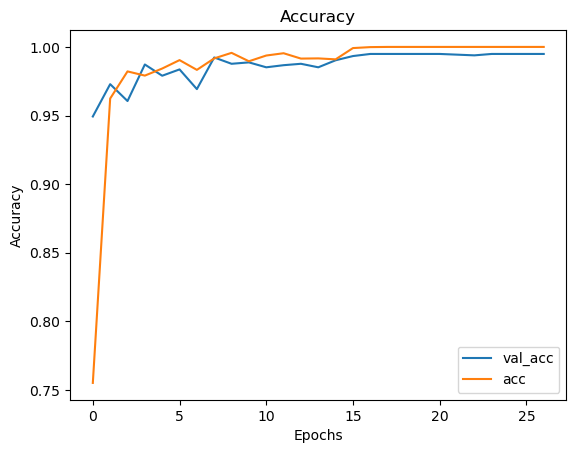

In [150]:
plt.figure() 
plt.plot(history_9.history['val_loss']) 
plt.plot(history_9.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_9.history['val_acc'])
plt.plot(history_9.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [151]:
model9_results_train = model9.evaluate(train_images, train_labels)
model9_results_val = model9.evaluate(val_images, val_labels)
model9_results_test = model9.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 233ms/step - loss: 1.2035 - acc: 0.8817


2022-12-26 01:21:33.057273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 228ms/step


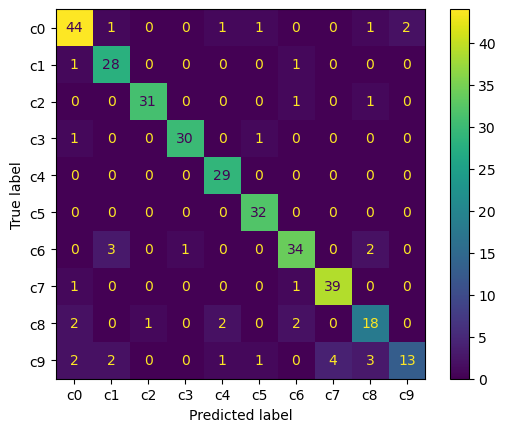

In [152]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model9, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 10

In [178]:
vgg16_f = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_f.layers[:-10]:
    layer.trainable=False

In [179]:
model10 = Sequential()
model10.add(vgg16_f)

model10.add(layers.Flatten())
model10.add(layers.Dense(512,activation='relu'))
model10.add(layers.Dense(10,activation='softmax'))

In [180]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model10.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [181]:
model10.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_23 (Flatten)        (None, 7680)              0         
                                                                 
 dense_45 (Dense)            (None, 512)               3932672   
                                                                 
 dense_46 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 17,507,082
Non-trainable params: 1,145,408
_________________________________________________________________


In [182]:
history_10 = model10.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-26 02:53:57.430912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.7463 - acc: 0.7456

2022-12-26 02:55:36.137268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 116s 160ms/step - loss: 0.7463 - acc: 0.7456 - val_loss: 0.3173 - val_acc: 0.8950
Epoch 2/30
718/718 [==============================] - 127s 177ms/step - loss: 0.1299 - acc: 0.9569 - val_loss: 0.1387 - val_acc: 0.9636
Epoch 3/30
718/718 [==============================] - 137s 191ms/step - loss: 0.0795 - acc: 0.9778 - val_loss: 0.0612 - val_acc: 0.9841
Epoch 4/30
718/718 [==============================] - 129s 179ms/step - loss: 0.0455 - acc: 0.9866 - val_loss: 0.0470 - val_acc: 0.9872
Epoch 5/30
718/718 [==============================] - 130s 181ms/step - loss: 0.0534 - acc: 0.9830 - val_loss: 0.0871 - val_acc: 0.9764
Epoch 6/30
718/718 [==============================] - 130s 181ms/step - loss: 0.0467 - acc: 0.9866 - val_loss: 0.0610 - val_acc: 0.9867
Epoch 7/30
718/718 [==============================] - 134s 186ms/step - loss: 0.0361 - acc: 0.9887 - val_loss: 0.2392 - val_acc: 0.9549
Epoch 8/30
718/718 [==============================] - 134s 

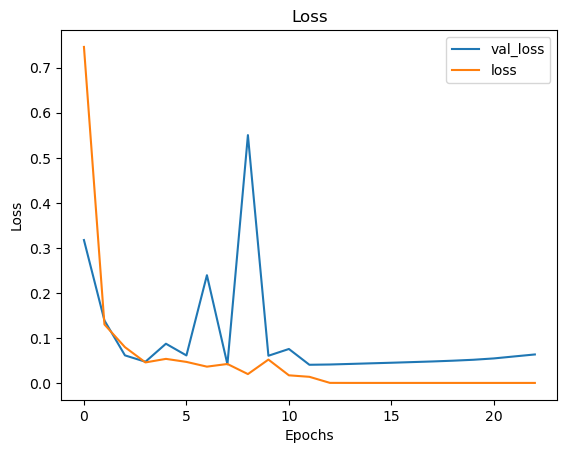

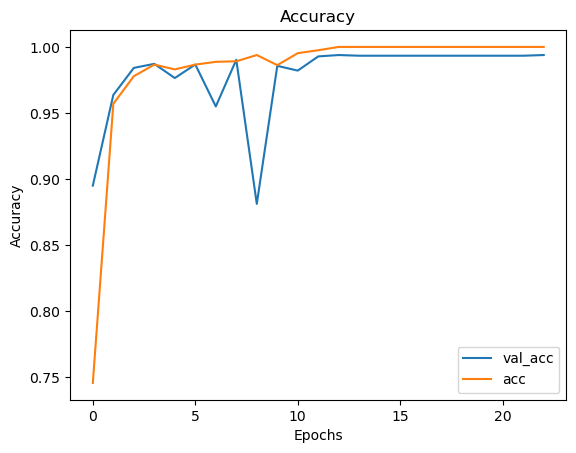

In [183]:
plt.figure() 
plt.plot(history_10.history['val_loss']) 
plt.plot(history_10.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_10.history['val_acc'])
plt.plot(history_10.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [184]:
model10_results_train = model10.evaluate(train_images, train_labels)
model10_results_val = model10.evaluate(val_images, val_labels)
model10_results_test = model10.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 151ms/step - loss: 1.2807 - acc: 0.8698


2022-12-26 07:48:03.574567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 153ms/step


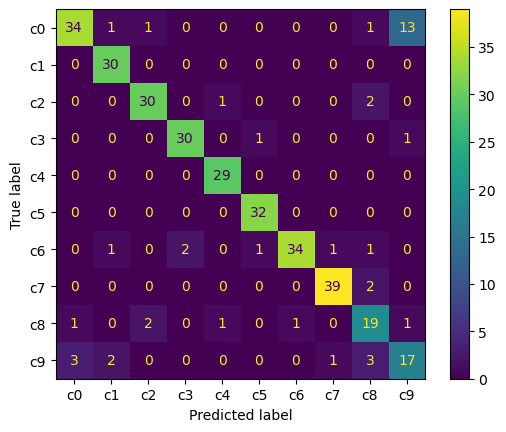

In [185]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model10, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

## Evaluation

### Examples

In [55]:
with open('models/model1.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [56]:
def load(filename):
    image = Image.open(filename)
    image = np.array(image).astype('float32')/255
    image = transform.resize(image, (160, 120, 3))
    image = np.expand_dims(image, axis=0)
    return image

In [66]:
image_1 = load('unlabelled_test_data/img_1.jpg')
prediction = lr.predict(image_1)

1/1 [==============================] - 0s 9ms/step


In [67]:
prediction_list = prediction[0].tolist()

In [68]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

5


In [69]:
image_2 = load('unlabelled_test_data/img_2.jpg')
prediction = lr.predict(image_2)

1/1 [==============================] - 0s 10ms/step


In [70]:
prediction_list = prediction[0].tolist()

In [71]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

8


In [72]:
image_3 = load('unlabelled_test_data/img_3.jpg')
prediction = lr.predict(image_3)

1/1 [==============================] - 0s 9ms/step


In [73]:
prediction_list = prediction[0].tolist()

In [74]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

# WRONG

8


In [78]:
image_8 = load('unlabelled_test_data/img_8.jpg')
prediction = lr.predict(image_8)

1/1 [==============================] - 0s 9ms/step


In [79]:
prediction_list = prediction[0].tolist()

In [80]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index) 

# RIGHT

3


In [81]:
image_88 = load('unlabelled_test_data/img_88.jpg')
prediction = lr.predict(image_88)

1/1 [==============================] - 0s 10ms/step


In [82]:
prediction_list = prediction[0].tolist()

In [83]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

6


In [ ]:
# Hair and makeup and talking on the phone with left hand are most easily confused

## Preparing for Deployment of Model

### Saving Model 6

In [239]:
# serialize model to JSON
model6_json = model6.to_json()
with open("models/model6.json", "w") as json_file:
    json_file.write(model6_json)
# serialize weights to HDF5
model6.save_weights("models/model6.h5")

In [240]:
with open("models/model6.pkl", "wb") as f:
    pickle.dump(model6, f)

INFO:tensorflow:Assets written to: ram://5885ca0b-e9a9-4610-ab4f-493d70f4f5e0/assets


INFO:tensorflow:Assets written to: ram://5885ca0b-e9a9-4610-ab4f-493d70f4f5e0/assets


### Saving Model 7

In [ ]:
# serialize model to JSON
model7_json = model7.to_json()
with open("models/model7.json", "w") as json_file:
    json_file.write(model7_json)
# serialize weights to HDF5
model7.save_weights("models/model7.h5")

In [ ]:
with open("models/model7.pkl", "wb") as f:
    pickle.dump(model7, f)

### Saving Model 8

In [138]:
# serialize model to JSON
model8_json = model8.to_json()
with open("models/model8.json", "w") as json_file:
    json_file.write(model8_json)
# serialize weights to HDF5
model8.save_weights("models/model8.h5")

In [139]:
with open("models/model8.pkl", "wb") as f:
    pickle.dump(model8, f)

INFO:tensorflow:Assets written to: ram://b4c32b33-143b-42d4-815e-385b776a8274/assets


INFO:tensorflow:Assets written to: ram://b4c32b33-143b-42d4-815e-385b776a8274/assets


### Saving Model 9

In [186]:
# serialize model to JSON
model9_json = model9.to_json()
with open("models/model9.json", "w") as json_file:
    json_file.write(model9_json)
# serialize weights to HDF5
model9.save_weights("models/model9.h5")

In [187]:
with open("models/model9.pkl", "wb") as f:
    pickle.dump(model9, f)

INFO:tensorflow:Assets written to: ram://47aa4bb4-f6ef-4789-8e6a-0bbf6e5e0c19/assets


INFO:tensorflow:Assets written to: ram://47aa4bb4-f6ef-4789-8e6a-0bbf6e5e0c19/assets


## Deployed Model

## Conclusions

### Limitations

* The test images had to be manually labeled, and as a result, the size of the test data is small
* The images are from a single angle, so in practice, the State Farm DashCam would need to be positioned the same way

### Next Steps

* Obtain a greater amount of labeled test data
* Build the model based on images from various angles
* Analyze a potential relationship between the use of a DashCam and improvements in driving behaviors